# Analyse und Plot-Erstellung für die Ergebnisse des Benchmarkings

In [2]:
from data_reader import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats.mstats.gmean as gm


In [21]:
random = ""
monotone = "Mon_"
concave = "Con_"
small = "it10_ints64.csv"
big =  "it20_ints128.csv"
step = "step_"
plin = "plin_"
to_first = "to_first\\"
to_opt = "to_opt\\"
mip_gap = "mip_gap\\"

['step_to_first\\it10_ints64.csv', 'step_to_first\\it20_ints128.csv', 'step_to_first\\Mon_it10_ints64.csv', 'step_to_first\\Mon_it20_ints128.csv', 'step_to_first\\Con_it10_ints64.csv', 'step_to_first\\Con_it20_ints128.csv', 'step_mip_gap\\it10_ints64.csv', 'step_mip_gap\\it20_ints128.csv', 'step_mip_gap\\Mon_it10_ints64.csv', 'step_mip_gap\\Mon_it20_ints128.csv', 'step_mip_gap\\Con_it10_ints64.csv', 'step_mip_gap\\Con_it20_ints128.csv', 'plin_to_first\\it10_ints64.csv', 'plin_to_first\\it20_ints128.csv', 'plin_to_first\\Mon_it10_ints64.csv', 'plin_to_first\\Mon_it20_ints128.csv', 'plin_to_first\\Con_it10_ints64.csv', 'plin_to_first\\Con_it20_ints128.csv', 'plin_mip_gap\\it10_ints64.csv', 'plin_mip_gap\\it20_ints128.csv', 'plin_mip_gap\\Mon_it10_ints64.csv', 'plin_mip_gap\\Mon_it20_ints128.csv', 'plin_mip_gap\\Con_it10_ints64.csv', 'plin_mip_gap\\Con_it20_ints128.csv']


dict_keys(['IndW', 'IndS', 'DCC', 'CC', 'Inc', 'DLog', 'IndLay'])


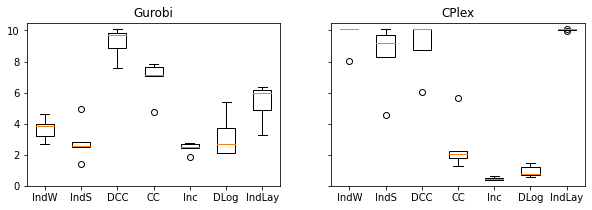

In [54]:
# Time to Optimum

path = "..\\data\\" + plin + mip_gap + concave + small
Searcher = FileSearcher(path)

data_dict_gurobi = {s: Searcher.search_in_file(s, "gurobi") for s in Searcher.get_model_strings()}
data_dict_cplex = {s: Searcher.search_in_file(s, "cplex") for s in Searcher.get_model_strings()}

translation = {'IndW': 'Indicator Weak', 'IndS':'Indicator Strong', 'DCC': 'DCC','CC': 'CC','Inc' : 'Incremental Concrete','DLog': 'DLog',  'IndLay': 'Indicator Layered'}
labels, data = data_dict_gurobi.keys(), data_dict_gurobi.values()
fit, (ax1, ax2) = plt.subplots(1,2, figsize= (10, 3), sharey=True)
print(translation.keys())
ax1.set_ylim(0,10.5)
ax1.boxplot([data_dict_gurobi[translation[key]] for key in translation.keys()])
ax1.set_xticks(range(1, len(translation.keys()) + 1))
ax1.set_xticklabels(translation.keys())
ax1.set_title("Gurobi")
ax2.boxplot([data_dict_cplex[translation[key]] for key in translation.keys()])
ax2.set_xticks(range(1, len(translation.keys()) + 1))
ax2.set_xticklabels(translation.keys())
ax2.set_title("CPlex")
plt.savefig("plots\\mip_plin_monotone.eps")
plt.show()

dict_keys(['Incremental', 'Binary 2', 'Indicator Strong Weak', 'Indicator Layered', 'Binary'])
dict_keys(['IndWS', 'Inc', 'Bin1', 'Bin2', 'IndLay'])


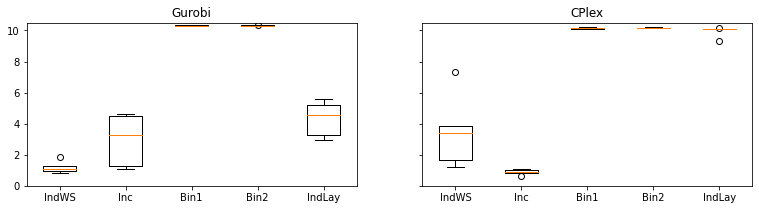

In [51]:
# Time to MIP-Gap 

path = "..\\data\\" + step + mip_gap + concave + small
Searcher = FileSearcher(path)

data_dict_gurobi = {s: Searcher.search_in_file(s, "gurobi") for s in Searcher.get_model_strings()}
data_dict_cplex = {s: Searcher.search_in_file(s, "cplex") for s in Searcher.get_model_strings()}
print(data_dict_gurobi.keys())
#translation = {'IndW': 'Indicator Weak', 'IndS':'Indicator Strong', 'IndSOS': 'Indicator Strong SOS1','IndWS': 'Indicator Strong Weak','Inc' : 'Incremental','Bin1': 'Binary',  'Bin2': 'Binary 2', 'IndLay': 'Indicator Layered'}
translation = {'IndWS': 'Indicator Strong Weak','Inc' : 'Incremental','Bin1': 'Binary',  'Bin2': 'Binary 2', 'IndLay': 'Indicator Layered'}
labels, data = data_dict_gurobi.keys(), data_dict_gurobi.values()
fit, (ax1, ax2) = plt.subplots(1,2, figsize= (13, 3), sharey=True)
print(translation.keys())
ax1.set_ylim(0,10.5)
ax1.boxplot([data_dict_gurobi[translation[key]] for key in translation.keys()])
ax1.set_xticks(range(1, len(translation.keys()) + 1))
ax1.set_xticklabels(translation.keys())
ax1.set_title("Gurobi")
ax2.boxplot([data_dict_cplex[translation[key]] for key in translation.keys()])
ax2.set_xticks(range(1, len(translation.keys()) + 1))
ax2.set_xticklabels(translation.keys())
ax2.set_title("CPlex")
plt.savefig("plots\\mip_step_concave_big.eps")
plt.show()

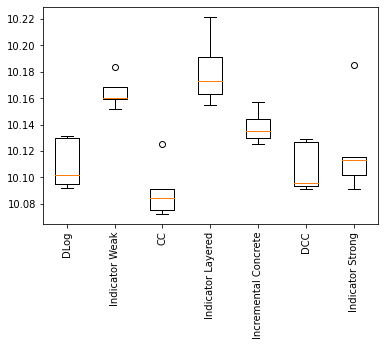

In [5]:
data_dict_cplex = {s: Searcher.search_in_file(s, "cplex") for s in Searcher.get_model_strings()}
labels, data = data_dict_cplex.keys(), data_dict_cplex.values()
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels, rotation = 90)
plt.show()

In [6]:
print(data)

dict_values([array([3.29672027, 5.58409882, 4.52889156, 2.93335271, 5.22196054]), array([4.6433115 , 4.52271557, 1.25863552, 3.27522874, 1.0533545 ]), array([10.33039451, 10.36728263, 10.31940985, 10.31160998, 10.31319857]), array([1.87430692, 1.2895515 , 0.84495664, 1.10205293, 0.9659555 ]), array([10.2737124 , 10.33083391, 10.27645063, 10.36061335, 10.2684083 ])])


dict_keys(['IndW', 'IndS', 'IndSOS', 'IndWS', 'Inc', 'Bin1', 'Bin2', 'IndLay'])


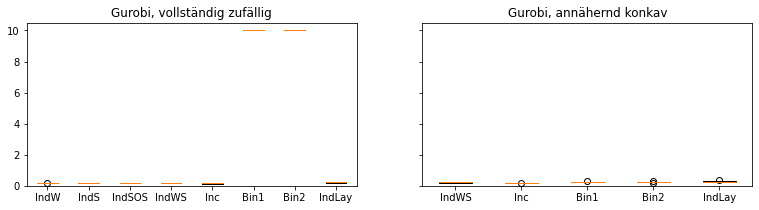

In [74]:
# Time to MIP-Gap 

path = "..\\data\\" + step + to_first + random + small
Searcher = FileSearcher(path)

data_dict_gurobi = {s: Searcher.search_in_file(s, "gurobi") for s in Searcher.get_model_strings()}
translation = {'IndW': 'Indicator Weak', 'IndS':'Indicator Strong', 'IndSOS': 'Indicator Strong SOS1','IndWS': 'Indicator Strong Weak','Inc' : 'Incremental','Bin1': 'Binary',  'Bin2': 'Binary 2', 'IndLay': 'Indicator Layered'}
translation2 = {'IndWS': 'Indicator Strong Weak','Inc' : 'Incremental','Bin1': 'Binary',  'Bin2': 'Binary 2', 'IndLay': 'Indicator Layered'}
labels, data = data_dict_gurobi.keys(), data_dict_gurobi.values()
fit, (ax1, ax2) = plt.subplots(1,2, figsize= (13, 3), sharey=True)
print(translation.keys())
ax1.set_ylim(0,10.5)
ax1.boxplot([data_dict_gurobi[translation[key]] for key in translation.keys()])
ax1.set_xticks(range(1, len(translation.keys()) + 1))
ax1.set_xticklabels(translation.keys())
ax1.set_title("Gurobi, vollständig zufällig")
path = "..\\data\\" + step + to_first + concave + small
Searcher = FileSearcher(path)
data_dict_gurobi = {s: Searcher.search_in_file(s, "gurobi") for s in Searcher.get_model_strings()}
ax2.boxplot([data_dict_gurobi[translation2[key]] for key in translation2.keys()])
ax2.set_xticks(range(1, len(translation2.keys()) + 1))
ax2.set_xticklabels(translation2.keys())
ax2.set_title("Gurobi, annähernd konkav")
plt.savefig("plots\\first_step_random_concave.eps")
plt.show()

dict_keys(['IndW', 'IndS', 'DCC', 'CC', 'Inc', 'DLog', 'IndLay'])


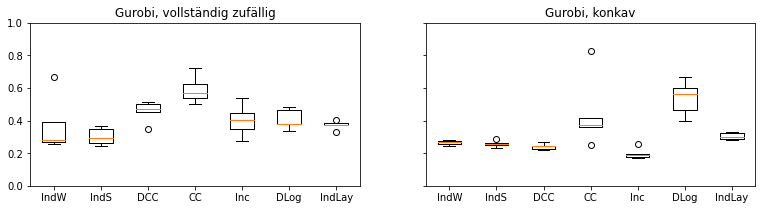

In [75]:
# Time to MIP-Gap 

path = "..\\data\\" + plin + to_first + random + small
Searcher = FileSearcher(path)

data_dict_gurobi = {s: Searcher.search_in_file(s, "gurobi") for s in Searcher.get_model_strings()}
translation = {'IndW': 'Indicator Weak', 'IndS':'Indicator Strong', 'DCC': 'DCC','CC': 'CC','Inc' : 'Incremental Concrete','DLog': 'DLog',  'IndLay': 'Indicator Layered'}
labels, data = data_dict_gurobi.keys(), data_dict_gurobi.values()
fit, (ax1, ax2) = plt.subplots(1,2, figsize= (13, 3), sharey=True)
print(translation.keys())
ax1.set_ylim(0,1)
ax1.boxplot([data_dict_gurobi[translation[key]] for key in translation.keys()])
ax1.set_xticks(range(1, len(translation.keys()) + 1))
ax1.set_xticklabels(translation.keys())
ax1.set_title("Gurobi, vollständig zufällig")
path = "..\\data\\" + plin + to_first + concave + small
Searcher = FileSearcher(path)
data_dict_gurobi = {s: Searcher.search_in_file(s, "gurobi") for s in Searcher.get_model_strings()}
ax2.boxplot([data_dict_gurobi[translation[key]] for key in translation.keys()])
ax2.set_xticks(range(1, len(translation.keys()) + 1))
ax2.set_xticklabels(translation.keys())
ax2.set_title("Gurobi, konkav")
plt.savefig("plots\\first_plin_random_concave.eps")
plt.show()

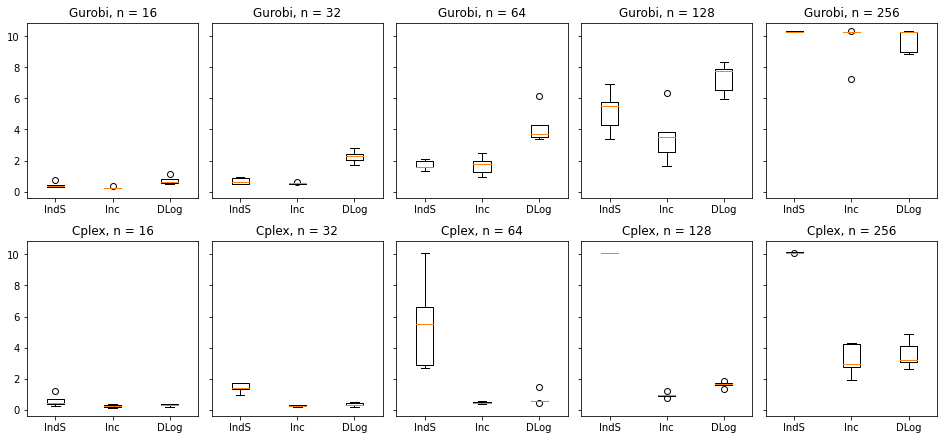

In [17]:
path = "../data/increase_n_ints/Con_it10_ints"
n_array = [16,32,64,128,256]
Searchers = [FileSearcher(path+str(n)+".csv") for n in n_array]
translation = { 'IndS':'Indicator Strong','Inc' : 'Incremental Concrete','DLog': 'DLog'}
data_dicts_gurobi = [{s: Searcher.search_in_file(s, "gurobi") for s in Searcher.get_model_strings()} for Searcher in Searchers]
data_dicts_cplex = [{s: Searcher.search_in_file(s, "cplex") for s in Searcher.get_model_strings()} for Searcher in Searchers]
fig, ax = plt.subplots(2,len(n_array),figsize= (13, 6), sharey = True, constrained_layout=True)
for i, data_dict in enumerate(data_dicts_gurobi):
    ax[0,i].boxplot([data_dict[translation[key]] for key in translation.keys()])
    ax[0,i].set_xticks(range(1, len(translation.keys()) + 1))
    ax[0,i].set_xticklabels(translation.keys())
    ax[0,i].set_title("Gurobi, n = " + str(n_array[i]))
for i, data_dict in enumerate(data_dicts_cplex):
    ax[1,i].boxplot([data_dict[translation[key]] for key in translation.keys()])
    ax[1,i].set_xticks(range(1, len(translation.keys()) + 1))
    ax[1,i].set_xticklabels(translation.keys())
    ax[1,i].set_title("Cplex, n = " + str(n_array[i]))
plt.savefig("plots\\increase_n_ints.eps")
plt.show()

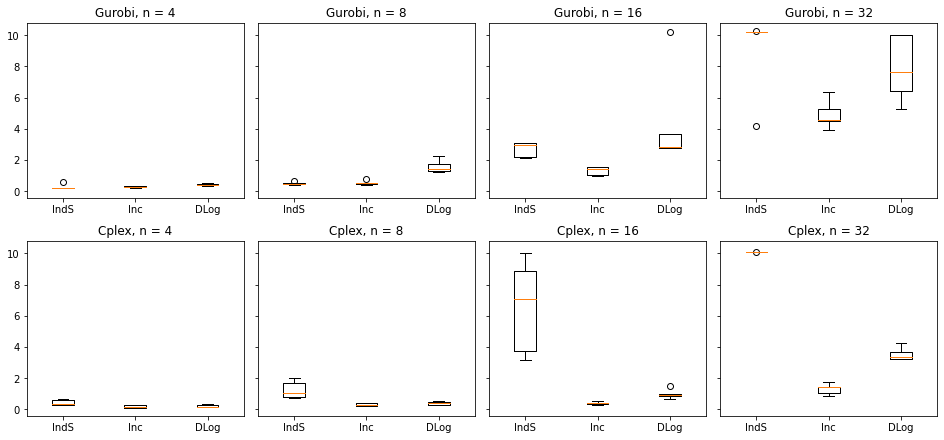

In [19]:
path = "../data/increase_N_its/Con_it"
N_array = [4,8,16,32]
Searchers = [FileSearcher(path+str(n)+"_ints32.csv") for n in N_array]
translation = { 'IndS':'Indicator Strong','Inc' : 'Incremental Concrete','DLog': 'DLog'}
data_dicts_gurobi = [{s: Searcher.search_in_file(s, "gurobi") for s in Searcher.get_model_strings()} for Searcher in Searchers]
data_dicts_cplex = [{s: Searcher.search_in_file(s, "cplex") for s in Searcher.get_model_strings()} for Searcher in Searchers]
fig, ax = plt.subplots(2,len(N_array),figsize= (13, 6), sharey = True, constrained_layout=True)
for i, data_dict in enumerate(data_dicts_gurobi):
    ax[0,i].boxplot([data_dict[translation[key]] for key in translation.keys()])
    ax[0,i].set_xticks(range(1, len(translation.keys()) + 1))
    ax[0,i].set_xticklabels(translation.keys())
    ax[0,i].set_title("Gurobi, n = " + str(N_array[i]))
for i, data_dict in enumerate(data_dicts_cplex):
    ax[1,i].boxplot([data_dict[translation[key]] for key in translation.keys()])
    ax[1,i].set_xticks(range(1, len(translation.keys()) + 1))
    ax[1,i].set_xticklabels(translation.keys())
    ax[1,i].set_title("Cplex, n = " + str(N_array[i]))
plt.savefig("plots\\increase_N_its.eps")
plt.show()

In [ ]:
path = "../data/increase_n_ints/Con_it10_ints"
n_array = [16,32,64,128,256]
Searchers = [FileSearcher(path+str(n)+".csv") for n in n_array]
translation = { 'IndS':'Indicator Strong','Inc' : 'Incremental Concrete','DLog': 'DLog'}
data_dicts_gurobi = [{s: Searcher.search_in_file(s, "gurobi") for s in Searcher.get_model_strings()} for Searcher in Searchers]
means_ind = [np.data_dict]
